## Определение итоговой оценки студента

В качестве данных мы будем рассматривать два датасета, а именно предсказание оценки по португальскому языку или математике. Данные возьмём из почтового ящика.

In [4]:
def get_dataset_name(email):
    return 'student-mat.csv' if sum(ord(c) for c in email) % 2 else 'student-por.csv'

In [5]:
get_dataset_name('pavlovilyaandreevich@yandex.ru')

'student-por.csv'

In [39]:
import numpy as np
import pandas as pd
import scipy as sp
import pylab as plt
from statistics import median

%matplotlib inline

Загружаем необходимые библиотеки и датасет:

In [7]:
data = pd.read_csv('student-por.csv', sep=';')
data = pd.DataFrame(data)

Выведем строку заголовка:

In [8]:
str(data[:0])

'Empty DataFrame\nColumns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3]\nIndex: []\n\n[0 rows x 33 columns]'

Как можно видеть, признаков много и они все разной природы. Ниже более подробная расшифровка признаков:

 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", "course" предпочтение некоторым предметам или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - колисечтво ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хорошо отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)

Признаки ниже связаны с курсом (математика/португальский)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - [целевая переменная] G3 - итоговая оценка (от 0 до 20)

Посмотрим на типы признаков:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

- school - бинарный
- sex - бинарный
- age - числовой
- address - порядковый
- famsize - бинарный
- Pstatus - бинарный
- Medu - порядковый
- Fedu - порядковый
- Mjob - категориальный
- Fjob - категориальный
- reason - категориальный
- guardian - категориальный
- traveltime - порядковый
- studytime - порядковый     
- failures - числовой     
- schoolsup - бинарный    
- famsup - бинарный  
- paid - бинарный         
- activities - бинарный    
- nursery - бинарный       
- higher - бинарный        
- internet - бинарный      
- romantic - бинарный      
- famrel - порядковый        
- freetime - порядковый   
- goout - порядковый        
- Dalc - порядковый          
- Walc - порядковый          
- health - порядковый       
- absences - числовой      
- G1 - порядковый            
- G2 - порядковый            
- G3 - порядковый      

Проверим, есть ли в данных пропуски:

In [10]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Признаков с пропусками нет.

Построим гистограммы для переменных, отображающих оценки за семестры и итоговую оценку:

Данная задача является задачей многоклассовой классификации, так как значения целевой переменной конечны, принадлежат 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}, а не области всех вещественных чисел, как 
было бы в задаче регрессии. Данная задача не может быть задачей кластеризации, так как её цель - предсказание, 
а не разбиение на кластеры.

Построим гистограмму значений целевой переменной и для признаков G1 и G2.

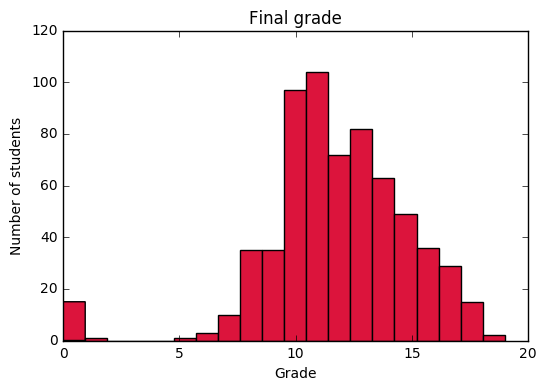

In [42]:
final_grade=(data['G3'])
plt.hist(final_grade, bins=20, color='crimson')
plt.title('Final grade')
plt.xlabel('Grade')
plt.ylabel('Number of students')
plt.show()

Самое частое значение - 11. Есть студенты, получившие 0, но нет студентов с оценкой 20.

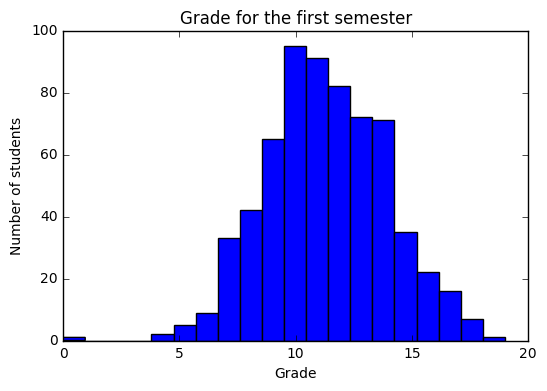

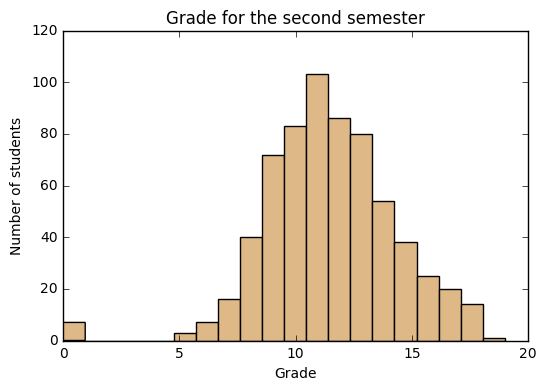

In [41]:
first_semester=data['G1']
plt.hist(first_semester, bins=20)
plt.title('Grade for the first semester')
plt.xlabel('Grade')
plt.ylabel('Number of students')
plt.show()

second_semester=data['G2']
plt.hist(second_semester, bins=20, color='burlywood')
plt.title('Grade for the second semester')
plt.xlabel('Grade')
plt.ylabel('Number of students')
plt.show()

Гистограммы итоговой оценки и оценки за второй семестр похожи тем, что максимальное значение в них равно 11, но во втором 
семестре отрыв этого значения от предыдущего по убыванию больше, чем в гистограмме итоговой оценки. Кроме того, гистораммы оценок
за первый и второй семестр показывают, что число студентов, получающих 10 и выше постоянно убывает (оценку 11 получает 
меньше студентов, 12 - ещё меньше и так далее). А на гистограмее финальных оценок значения 11 и 13 нарушают
общую убывающую тенденцию.

Посчитаем линейную корреляцию между целевой переменной и признаками G1 и G2:

In [12]:
data['G1'].corr(data['G3'])

0.82638712478904752

In [13]:
data['G2'].corr(data['G3'])

0.91854800356035127

Мы видим, что признаки G1 и G2 сильно прямо связаны с целевой переменной.

Самой частой причиной выбора школы является предпочтение определённым предметам:

In [15]:
print(data['reason'].value_counts())

course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64


**(1 балл)** В данных есть несколько интересных признаков. Например, школа. Постройте на одной гистограмме распределение целевой переменной в зависимости от школы. Верно или нет, что у студенты одной школы имеют оценки выше, чем другой? Кроме того, интересно также узнать, сказывается ли причина выборка школы на оценках. Постройте аналогичную гистограмму для тех, у кого в поле причины указана самая частая причина (она должна быть найдена в предыдущем пункте) и всех остальных. Верно ли, что студентны, выбравшие данную школу по этой причине более успешны?

(Примеры как можно строить такие гистограммы можно посмотреть в материалах к семинарам или [здесь](http://matplotlib.org/examples/statistics/histogram_demo_multihist.html) и [здесь](http://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib)). 

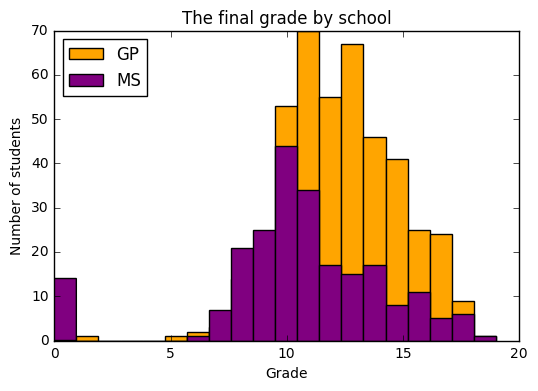

In [69]:
GP = data.loc[data['school']=='GP']['G3']
MS = data.loc[data['school']=='MS']['G3']
plt.hist(GP, bins=20, label = "GP", color = 'orange')
plt.hist(MS, bins=20, label = "MS", color = 'purple')
plt.title('The final grade by school')
plt.xlabel('Grade')
plt.ylabel('Number of students')
plt.legend(loc='upper left')
plt.show()

По графику заметно, что учащиеся школы типа GP учатся лучше, чем ученики школы MS.

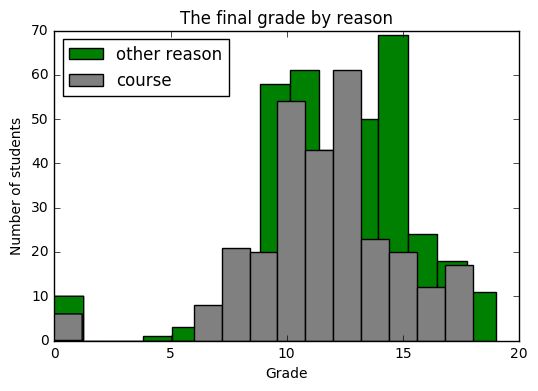

In [68]:
course = data.loc[data['reason']=='course']['G3']
other = data.loc[data['reason']!='course']['G3']
plt.hist(other, bins=15, label = "other reason", color = 'green')
plt.hist(course, bins=15, label = "course", color = 'grey')
plt.title('The final grade by reason')
plt.xlabel('Grade')
plt.ylabel('Number of students')
plt.legend(loc='upper left')
plt.show()

Учащиеся, выбравшие тип школы отталкиваясь от набора предметов, в среднем учатся так же, как те, кто указал иную причину выбора.

In [40]:
print(data['age'].mean())
print(median(data['age']))
print(data['age'].var())
print(data['age'].min())
print(data['age'].max())
print(data['failures'].mean())
print(median(data['failures']))
print(data['failures'].var())
print(data['failures'].min())
print(data['failures'].max())
print(data['absences'].mean())
print(median(data['absences']))
print(data['absences'].var())
print(data['absences'].min())
print(data['absences'].max())

16.7442218798151
17
1.483859308718057
15
22
0.2218798151001541
0
0.35192794232342484
0
3
3.6594761171032357
2
21.53664231771551
0
32


Для всех признаков данные статистические показатели имеют смысл. К примеру, среднее значение возраста показывает,
каков средний возраст студентов. Медиана возраста показывает, что студент может быть как младше, так и старше 17-ти
лет с равной вероятностью. Дисперсия пропусков показывает, насколько однородны студенты относительно количества 
пропущенных дней, минимальное значение ранее не сданных предметов показывает, сколько предметов максимально сдавал
студент и так далее.

Посмотрим успеваемость учеников (переменная G3) в зависимости от количества их пропусков: 

In [72]:
print(pd.DataFrame(data.groupby('absences')['G3'].mean()))

                 G3
absences           
0         12.040984
1         12.416667
2         12.190909
3         10.428571
4         12.010753
5         11.750000
6         12.122449
7         13.000000
8         11.619048
9          9.714286
10        12.238095
11        11.200000
12        10.083333
13        14.000000
14        10.375000
15        11.000000
16        10.300000
18        12.333333
21        11.500000
22         8.000000
24         9.000000
26         8.000000
30        16.000000
32        14.000000


Заметно, что лучшая успеваемость у учеников, кто в средем прогуливает 30 раз. Это кажется странным. Посмотрим на медиану:

In [73]:
print(pd.DataFrame(data.groupby('absences')['G3'].median()))

            G3
absences      
0         13.0
1         12.5
2         12.0
3         10.0
4         11.0
5         11.0
6         12.0
7         15.0
8         11.0
9         10.0
10        11.0
11        11.0
12        10.0
13        14.0
14        10.5
15        11.0
16        10.0
18        13.0
21        11.5
22         8.0
24         9.0
26         8.0
30        16.0
32        14.0


Анализ медианы даёт аналогичные анализу среднего результаты. Посмотрмим на суммы оценок в разрезе по пропускам:

In [74]:
print(pd.DataFrame(data.groupby('absences')['G3'].sum()))

            G3
absences      
0         2938
1          149
2         1341
3           73
4         1117
5          141
6          594
7           39
8          488
9           68
10         257
11          56
12         121
13          14
14          83
15          22
16         103
18          37
21          23
22          16
24           9
26           8
30          16
32          14


Мы обнаружили, что только один ученик прогулял 30 раз, однако получил 16. Было бы спекулятивным делать выводы о том, что те, кто прогуливает 30 раз, получают наивысшую итоговую оценку на основании одного прецедента. Поставим пороговое значение суммы 60, которое будет включать как миниумум трёх учеников (даже если они все получили 20). 

В таком случае лучшая успеваемость у тех, кто не прогулял ни одного раза, а худшая – у тех, кто пропустил 9, 12 или 16 раз. Такие выводы кажутся более правдоподобными.

Интересно узнать, студенты желающие получить высшее образование учатся лучше, чем все остальные, или нет:

In [76]:
print(pd.DataFrame(data.groupby('higher')['G3'].mean()))

               G3
higher           
no       8.797101
yes     12.275862


Видим, что их итоговая оценка выше.

## Анализ других признаков

Посмотрим на ранее необработанные нами признаки:

### Размер семьи

Можно рассмотореть такой признак, как размер семьи:

In [79]:
print(pd.DataFrame(data.groupby('famsize')['G3'].mean()))

                G3
famsize           
GT3      11.811816
LE3      12.130208


Мы обнаружили, что студенты из больших семей учатся лучше, чем из малых, но расхождение всего лишь в 0.3 балла.

### Употребление алкоголя в будни

Можно обратиться к такому признаку, как употребление алкоголя в будние дни:

In [82]:
print(pd.DataFrame(data.groupby('Dalc')['G3'].mean()))

             G3
Dalc           
1     12.299335
2     11.363636
3     11.139535
4      8.941176
5     10.235294


Получилось, что чем меньше студент выпивает, тем лучше у него оценки. Правда, есть необъяснимая флуктуация
у студентов, пьющих очень часто и получающих лучшие оценки, чем те, кто пьёт часто. Нельзя сказать, что группа пьющих очень часто, является малонаполненной:

In [83]:
print(pd.DataFrame(data.groupby('Dalc')['G3'].sum()))

        G3
Dalc      
1     5547
2     1375
3      479
4      152
5      174


### Образование отца

Рассмотрим такой признак, как образование отца:

In [64]:
n1_data = pd.DataFrame(data.groupby('Medu')['G3'].mean())
print(n1_data)

             G3
Medu           
0     11.666667
1     10.797203
2     11.661290
3     11.920863
4     13.068571


Как видно, чем выше образование отца, тем лучше итоговая оценка ребёнка. Правда, студенты, чьи отцы вообще не имеют
образования учатся лучше студентов, чьи отцы имеют начальное образование и образование от 5 до 9 классов, что, может быть, вызвано желанием не быть похожим на своих родителей и выбиться в люди.